# Modelo 4 Decision Tree con todas las variables

### Carga y división de datos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Carga de los datos
df_ingresos_m1 = pd.read_csv('../Datos/Procesados/income.csv')
df_ingresos_m1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# División de datos
X = df_ingresos_m1.drop(columns=['income'])
y = df_ingresos_m1.income

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Creación del pipeline

In [4]:
# Dividir columnas
columnas_categoricas = X.select_dtypes(include='object').columns.tolist()

# Preprocesador con OneHotEncoder
preprocesador = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), columnas_categoricas)
    ], remainder='passthrough'
)

In [5]:
# Pipeline
pipeline = Pipeline(steps=[
    ('preprocesamiento', preprocesador),
    ('modelo', DecisionTreeClassifier(max_depth=2, random_state=42))
])

In [6]:
# Predicciones 
pipeline.fit(X_train, y_train)
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

### Evaluación del modelo

In [7]:
#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('Accuracy train:', train_accuracy)
print('Accuracy test:', test_accuracy)

Accuracy train: 0.8281853281853282
Accuracy test: 0.8283345275872659


In [8]:
# Clasification report
reporte = classification_report(y_test, y_test_pred)
print(reporte)

              precision    recall  f1-score   support

       <=50K       0.84      0.95      0.89      7455
        >50K       0.73      0.44      0.55      2314

    accuracy                           0.83      9769
   macro avg       0.79      0.69      0.72      9769
weighted avg       0.82      0.83      0.81      9769



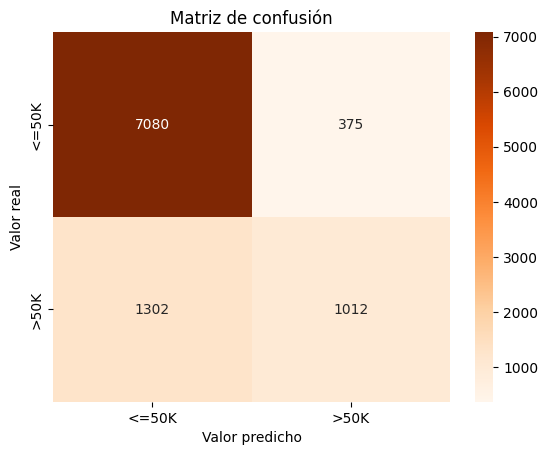

In [14]:
matriz_confusion = confusion_matrix(y_test, y_test_pred)
sns.heatmap(matriz_confusion, annot=True, fmt='d', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'], cmap='Oranges')
plt.xlabel("Valor predicho")
plt.ylabel("Valor real")
plt.title("Matriz de confusión")
plt.show();